Based on [https://snowex-2021.hackweek.io/tutorials/geospatial/SNOTEL_query.html](https://snowex-2021.hackweek.io/tutorials/geospatial/SNOTEL_query.html)

In [2]:
import os
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import ulmo

In [3]:
#This is the latest CUAHSI API endpoint
wsdlurl = 'https://hydroportal.cuahsi.org/Snotel/cuahsi_1_1.asmx?WSDL'
sites = ulmo.cuahsi.wof.get_sites(wsdlurl)

In [4]:
#Preview first item in dictionary
next(iter(sites.items()))

('SNOTEL:301_CA_SNTL',
 {'code': '301_CA_SNTL',
  'name': 'Adin Mtn',
  'network': 'SNOTEL',
  'location': {'latitude': '41.2358283996582',
   'longitude': '-120.79192352294922'},
  'elevation_m': '1886.7120361328125',
  'site_property': {'county': 'Modoc',
   'state': 'California',
   'site_comments': 'beginDate=10/1/1983 12:00:00 AM|endDate=1/1/2100 12:00:00 AM|HUC=180200021403|HUD=18020002|TimeZone=-8.0|actonId=20H13S|shefId=ADMC1|stationTriplet=301:CA:SNTL|isActive=True',
   'pos_accuracy_m': '0'}})

In [5]:
sites_df = pd.DataFrame.from_dict(sites, orient='index').dropna()
sites_df.head()

,code,name,network,location,elevation_m,site_property
SNOTEL:301_CA_SNTL,301_CA_SNTL,Adin Mtn,SNOTEL,"{'latitude': '41.2358283996582', 'longitude': ...",1886.7120361328125,"{'county': 'Modoc', 'state': 'California', 'si..."
SNOTEL:907_UT_SNTL,907_UT_SNTL,Agua Canyon,SNOTEL,"{'latitude': '37.522171020507813', 'longitude'...",2712.719970703125,"{'county': 'Kane', 'state': 'Utah', 'site_comm..."
SNOTEL:916_MT_SNTL,916_MT_SNTL,Albro Lake,SNOTEL,"{'latitude': '45.59722900390625', 'longitude':...",2529.840087890625,"{'county': 'Madison', 'state': 'Montana', 'sit..."
SNOTEL:1267_AK_SNTL,1267_AK_SNTL,Alexander Lake,SNOTEL,"{'latitude': '61.749668121337891', 'longitude'...",48.768001556396484,"{'county': 'Matanuska-Susitna', 'state': 'Alas..."
SNOTEL:908_WA_SNTL,908_WA_SNTL,Alpine Meadows,SNOTEL,"{'latitude': '47.779571533203125', 'longitude'...",1066.800048828125,"{'county': 'King', 'state': 'Washington', 'sit..."


In [6]:
sites_df['geometry'] = [Point(float(loc['longitude']), float(loc['latitude'])) for loc in sites_df['location']]

In [7]:
sites_df = sites_df.drop(columns='location')
sites_df = sites_df.astype({"elevation_m":float})

In [8]:
sites_df.head()

,code,name,network,elevation_m,site_property,geometry
SNOTEL:301_CA_SNTL,301_CA_SNTL,Adin Mtn,SNOTEL,1886.712036,"{'county': 'Modoc', 'state': 'California', 'si...",POINT (-120.79192352294922 41.2358283996582)
SNOTEL:907_UT_SNTL,907_UT_SNTL,Agua Canyon,SNOTEL,2712.719971,"{'county': 'Kane', 'state': 'Utah', 'site_comm...",POINT (-112.27117919921875 37.52217102050781)
SNOTEL:916_MT_SNTL,916_MT_SNTL,Albro Lake,SNOTEL,2529.840088,"{'county': 'Madison', 'state': 'Montana', 'sit...",POINT (-111.95902252197266 45.59722900390625)
SNOTEL:1267_AK_SNTL,1267_AK_SNTL,Alexander Lake,SNOTEL,48.768002,"{'county': 'Matanuska-Susitna', 'state': 'Alas...",POINT (-150.88966369628906 61.74966812133789)
SNOTEL:908_WA_SNTL,908_WA_SNTL,Alpine Meadows,SNOTEL,1066.800049,"{'county': 'King', 'state': 'Washington', 'sit...",POINT (-121.69847106933594 47.779571533203125)


In [9]:
sites_df.loc['SNOTEL:301_CA_SNTL']

code                                                   301_CA_SNTL
name                                                      Adin Mtn
network                                                     SNOTEL
elevation_m                                            1886.712036
site_property    {'county': 'Modoc', 'state': 'California', 'si...
geometry              POINT (-120.79192352294922 41.2358283996582)
Name: SNOTEL:301_CA_SNTL, dtype: object

In [10]:
sites_df.loc['SNOTEL:301_CA_SNTL']['site_property']

{'county': 'Modoc',
 'state': 'California',
 'site_comments': 'beginDate=10/1/1983 12:00:00 AM|endDate=1/1/2100 12:00:00 AM|HUC=180200021403|HUD=18020002|TimeZone=-8.0|actonId=20H13S|shefId=ADMC1|stationTriplet=301:CA:SNTL|isActive=True',
 'pos_accuracy_m': '0'}

In [11]:
sites_gdf_all = gpd.GeoDataFrame(sites_df, crs='EPSG:4326')
sites_gdf_all.head()

,code,name,network,elevation_m,site_property,geometry
SNOTEL:301_CA_SNTL,301_CA_SNTL,Adin Mtn,SNOTEL,1886.712036,"{'county': 'Modoc', 'state': 'California', 'si...",POINT (-120.79192 41.23583)
SNOTEL:907_UT_SNTL,907_UT_SNTL,Agua Canyon,SNOTEL,2712.719971,"{'county': 'Kane', 'state': 'Utah', 'site_comm...",POINT (-112.27118 37.52217)
SNOTEL:916_MT_SNTL,916_MT_SNTL,Albro Lake,SNOTEL,2529.840088,"{'county': 'Madison', 'state': 'Montana', 'sit...",POINT (-111.95902 45.59723)
SNOTEL:1267_AK_SNTL,1267_AK_SNTL,Alexander Lake,SNOTEL,48.768002,"{'county': 'Matanuska-Susitna', 'state': 'Alas...",POINT (-150.88966 61.74967)
SNOTEL:908_WA_SNTL,908_WA_SNTL,Alpine Meadows,SNOTEL,1066.800049,"{'county': 'King', 'state': 'Washington', 'sit...",POINT (-121.69847 47.77957)


In [12]:
#geojson of state polygons
states_url = 'http://eric.clst.org/assets/wiki/uploads/Stuff/gz_2010_us_040_00_5m.json'
states_gdf = gpd.read_file(states_url)

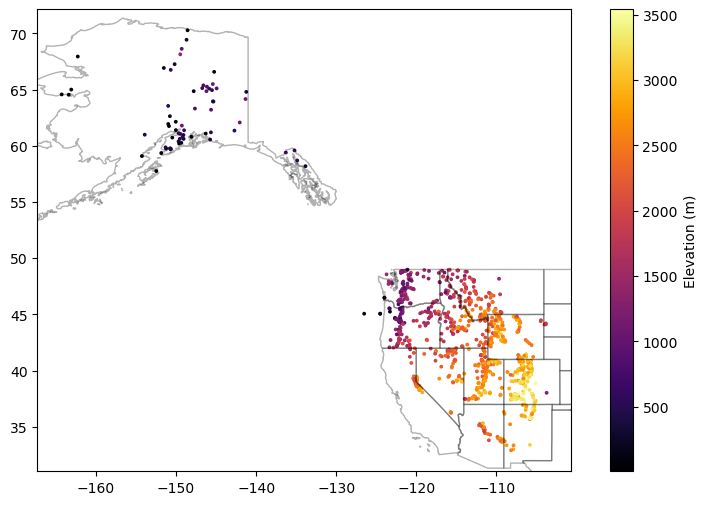

In [13]:
f, ax = plt.subplots(figsize=(10,6))
sites_gdf_all.plot(ax=ax, column='elevation_m', markersize=3, cmap='inferno', legend=True, legend_kwds={'label': "Elevation (m)"})
#This prevents matplotlib from updating the axes extent (states polygons cover larger area than SNOTEL points)
ax.autoscale(False)
states_gdf.plot(ax=ax, facecolor='none', edgecolor='k', alpha=0.3);

In [14]:
sites_gdf_conus = sites_gdf_all[(sites_gdf_all.index.str.contains('CO'))]


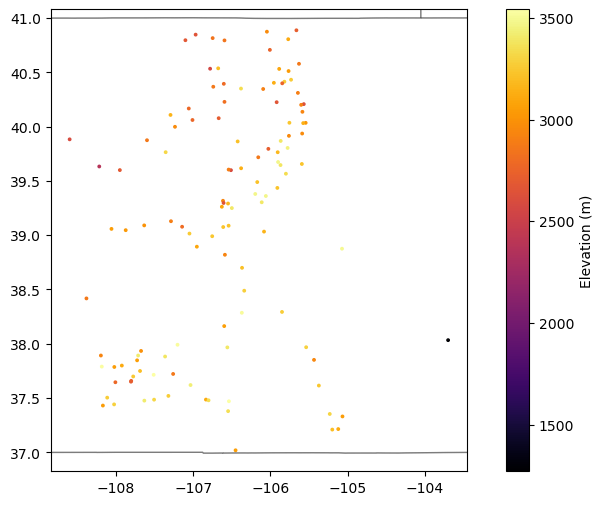

In [15]:
f, ax = plt.subplots(figsize=(10,6))
sites_gdf_conus.plot(ax=ax, column='elevation_m', markersize=3, cmap='inferno', legend=True, legend_kwds={'label': "Elevation (m)"})
ax.autoscale(False)
states_gdf.plot(ax=ax, facecolor='none', edgecolor='k', alpha=0.3);

In [17]:
sites_fn = 'snotel_conus_sites.json'
if not os.path.exists(sites_fn):
    sites_gdf_conus.to_file(sites_fn, driver='GeoJSON')

In [18]:
sites_gdf_conus

,code,name,network,elevation_m,site_property,geometry
SNOTEL:303_CO_SNTL,303_CO_SNTL,Apishapa,SNOTEL,3048.000000,"{'county': 'Huerfano', 'state': 'Colorado', 's...",POINT (-105.06749 37.33062)
SNOTEL:1030_CO_SNTL,1030_CO_SNTL,Arapaho Ridge,SNOTEL,3340.607910,"{'county': 'Grand', 'state': 'Colorado', 'site...",POINT (-106.38142 40.35098)
SNOTEL:305_CO_SNTL,305_CO_SNTL,Arrow,SNOTEL,2950.464111,"{'county': 'Grand', 'state': 'Colorado', 'site...",POINT (-105.76083 39.91550)
SNOTEL:322_CO_SNTL,322_CO_SNTL,Bear Lake,SNOTEL,2895.600098,"{'county': 'Larimer', 'state': 'Colorado', 'si...",POINT (-105.64483 40.31118)
SNOTEL:1061_CO_SNTL,1061_CO_SNTL,Bear River,SNOTEL,2767.583984,"{'county': 'Routt', 'state': 'Colorado', 'site...",POINT (-107.00955 40.06153)
...,...,...,...,...,...,...
SNOTEL:1042_CO_SNTL,1042_CO_SNTL,Wild Basin,SNOTEL,2913.887939,"{'county': 'Boulder', 'state': 'Colorado', 'si...",POINT (-105.60248 40.20105)
SNOTEL:869_CO_SNTL,869_CO_SNTL,Willow Creek Pass,SNOTEL,2907.791992,"{'county': 'Grand', 'state': 'Colorado', 'site...",POINT (-106.09433 40.34703)
SNOTEL:870_CO_SNTL,870_CO_SNTL,Willow Park,SNOTEL,3261.360107,"{'county': 'Larimer', 'state': 'Colorado', 'si...",POINT (-105.73337 40.43254)
SNOTEL:874_CO_SNTL,874_CO_SNTL,Wolf Creek Summit,SNOTEL,3352.800049,"{'county': 'Mineral', 'state': 'Colorado', 'si...",POINT (-106.80170 37.47922)


In [19]:
sitecode = sites_gdf_conus.index[-1]
sitecode

'SNOTEL:1033_CO_SNTL'

In [20]:
ulmo.cuahsi.wof.get_site_info(wsdlurl, sitecode)['series'].keys()

dict_keys(['SNOTEL:BATT_D', 'SNOTEL:BATT_H', 'SNOTEL:BATX_H', 'SNOTEL:PRCP_y', 'SNOTEL:PRCP_sm', 'SNOTEL:PRCP_m', 'SNOTEL:PRCP_wy', 'SNOTEL:PRCPSA_y', 'SNOTEL:PRCPSA_D', 'SNOTEL:PRCPSA_sm', 'SNOTEL:PRCPSA_m', 'SNOTEL:PRCPSA_wy', 'SNOTEL:PREC_sm', 'SNOTEL:PREC_m', 'SNOTEL:PREC_wy', 'SNOTEL:SNWD_D', 'SNOTEL:SNWD_sm', 'SNOTEL:SNWD_H', 'SNOTEL:SNWD_m', 'SNOTEL:TAVG_y', 'SNOTEL:TAVG_D', 'SNOTEL:TAVG_sm', 'SNOTEL:TAVG_m', 'SNOTEL:TAVG_wy', 'SNOTEL:TMAX_y', 'SNOTEL:TMAX_D', 'SNOTEL:TMAX_sm', 'SNOTEL:TMAX_m', 'SNOTEL:TMAX_wy', 'SNOTEL:TMIN_y', 'SNOTEL:TMIN_D', 'SNOTEL:TMIN_sm', 'SNOTEL:TMIN_m', 'SNOTEL:TMIN_wy', 'SNOTEL:TOBS_D', 'SNOTEL:TOBS_sm', 'SNOTEL:TOBS_H', 'SNOTEL:TOBS_m', 'SNOTEL:WTEQ_D', 'SNOTEL:WTEQ_sm', 'SNOTEL:WTEQ_H', 'SNOTEL:WTEQ_m'])

In [21]:
#Daily SWE
variablecode = 'SNOTEL:WTEQ_D'

In [22]:
ulmo.cuahsi.wof.get_variable_info(wsdlurl, variablecode)

{'value_type': 'Field Observation',
 'data_type': 'Continuous',
 'general_category': 'Soil',
 'sample_medium': 'Snow',
 'no_data_value': '-9999',
 'speciation': 'Not Applicable',
 'code': 'WTEQ_D',
 'id': '310',
 'name': 'Snow water equivalent',
 'vocabulary': 'SNOTEL',
 'time': {'is_regular': True,
  'interval': '1',
  'units': {'abbreviation': 'd',
   'code': '104',
   'name': 'day',
   'type': 'Time'}},
 'units': {'abbreviation': 'in',
  'code': '49',
  'name': 'international inch',
  'type': 'Length'}}

In [23]:
#Get current datetime
today = datetime.today().strftime('%Y-%m-%d')

def snotel_fetch(sitecode, variablecode='SNOTEL:SNWD_D', start_date='1950-10-01', end_date=today):
    #print(sitecode, variablecode, start_date, end_date)
    values_df = None
    try:
        #Request data from the server
        site_values = ulmo.cuahsi.wof.get_values(wsdlurl, sitecode, variablecode, start=start_date, end=end_date)
        #Convert to a Pandas DataFrame   
        values_df = pd.DataFrame.from_dict(site_values['values'])
        #Parse the datetime values to Pandas Timestamp objects
        values_df['datetime'] = pd.to_datetime(values_df['datetime'], utc=True)
        #Set the DataFrame index to the Timestamps
        values_df = values_df.set_index('datetime')
        #Convert values to float and replace -9999 nodata values with NaN
        values_df['value'] = pd.to_numeric(values_df['value']).replace(-9999, np.nan)
        #Remove any records flagged with lower quality
        values_df = values_df[values_df['quality_control_level_code'] == '1']
    except:
        print("Unable to fetch %s" % variablecode)

    return values_df

In [24]:
#Get all records, can filter later
start_date = datetime(1950,1,1)
end_date = datetime.today()

print(sitecode)
values_df = snotel_fetch(sitecode, variablecode, start_date, end_date)
values_df.shape

SNOTEL:1033_CO_SNTL


(7710, 8)

In [25]:
values_df.head()

,value,qualifiers,censor_code,date_time_utc,method_id,method_code,source_code,quality_control_level_code
datetime,,,,,,,,
2002-10-01 00:00:00+00:00,0.0,E,nc,2002-10-01T00:00:00,0,0,1,1
2002-10-02 00:00:00+00:00,0.0,E,nc,2002-10-02T00:00:00,0,0,1,1
2002-10-03 00:00:00+00:00,0.1,E,nc,2002-10-03T00:00:00,0,0,1,1
2002-10-04 00:00:00+00:00,0.6,E,nc,2002-10-04T00:00:00,0,0,1,1
2002-10-05 00:00:00+00:00,0.6,E,nc,2002-10-05T00:00:00,0,0,1,1


In [26]:
#Get number of decimal years between first and last observation
nyears = (values_df.index.max() - values_df.index.min()).days/365.25
nyears

21.10609171800137

<Axes: xlabel='datetime'>

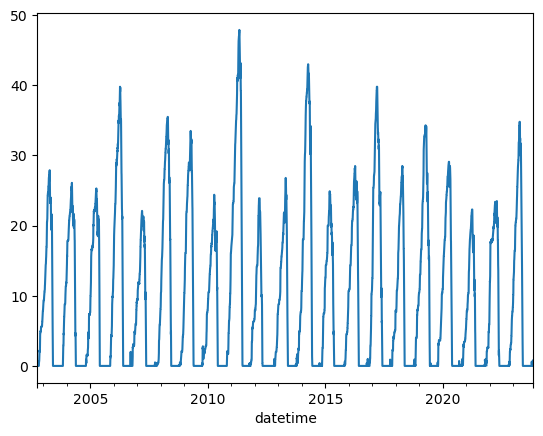

In [29]:
values_df['value'].plot()

In [50]:
stat_list = ['count','min','max','mean','std','median']
doy_stats = values_df.groupby('dowy')['value'].agg(stat_list)
doy_stats

,count,min,max,mean,std,median
dowy,,,,,,
1,22,0.0,0.3,0.018182,0.066450,0.0
2,22,0.0,0.5,0.077273,0.171636,0.0
3,22,0.0,0.9,0.068182,0.198534,0.0
4,22,0.0,0.8,0.077273,0.213657,0.0
5,22,0.0,0.6,0.081818,0.168003,0.0
...,...,...,...,...,...,...
361,21,0.0,0.0,0.000000,0.000000,0.0
362,21,0.0,0.0,0.000000,0.000000,0.0
363,21,0.0,0.2,0.009524,0.043644,0.0


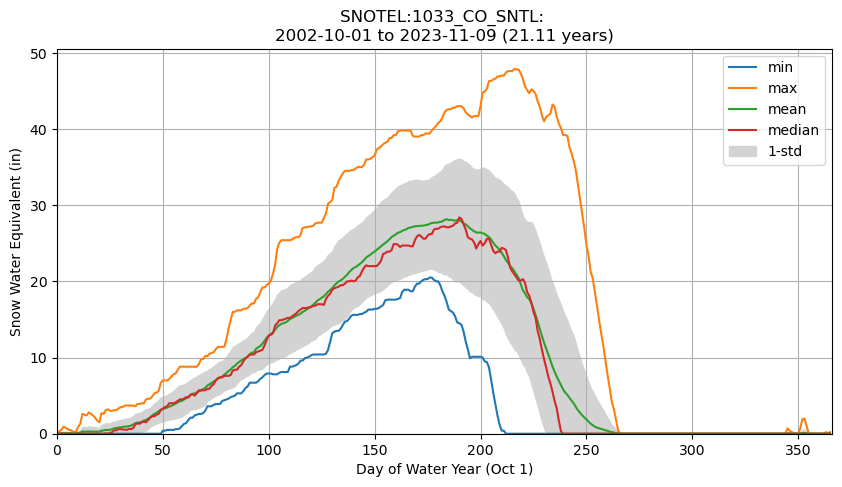

In [52]:
f,ax = plt.subplots(figsize=(10,5))

for stat in ['min','max','mean','median']:
    ax.plot(doy_stats.index, doy_stats[stat], label=stat)

ax.fill_between(doy_stats.index, doy_stats['mean'] - doy_stats['std'], doy_stats['mean'] + doy_stats['std'], \
                color='lightgrey', label='1-std')

title = f'{sitecode}: \n{values_df.index.min().date()} to {values_df.index.max().date()} ({nyears:.2f} years)'

ax.set_title(title)
ax.set_xlabel('Day of Water Year (Oct 1)')
ax.set_ylabel('Snow Water Equivalent (in)')
ax.grid()
ax.legend()
ax.set_xlim(0,366)
ax.set_ylim(bottom=0);